In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from diffusers import StableDiffusionPipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, cache_dir="Tarz")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
pipe = pipe.to("cuda")

prompt = "Moroccan embroidery \"Tarz\" "
image = pipe(prompt).images[0]  
    


  0%|          | 0/50 [00:00<?, ?it/s]

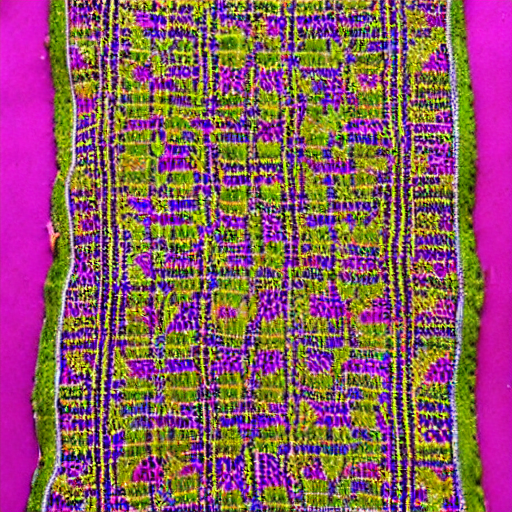

In [ ]:
image

In [ ]:
import gradio as gr
from PIL import Image
import requests
import numpy as np
import io

# Define the available options for Moroccan embroidery
tarz_options = ["\"Tarz\" from Rabat", "\"Tarz\" from Fez", "\"Tarz\" from Amazigh", "\"Tarz\""]


# Define the available options for displaying the embroidery
display_options = ["Moroccan Caftan", "Napkins", "Tablecloth", "T-shirt"]

def generate_image(tarz_type, display_type):
    # Use the model to generate an image based on the selected tarz type and display type
    seed = f"Moroccan embroidery {tarz_type} on {display_type}"
    image = pipe(seed).images[0]
    return image

# Create a Gradio interface for the generate_image function
interface = gr.Interface(
    fn=generate_image,
    inputs=[
        gr.inputs.Dropdown(tarz_options, label="Select a type of Moroccan embroidery"),
        gr.inputs.Radio(display_options, label="Select where to display the embroidery")
    ],
    outputs=gr.outputs.Image(type="pil", label="Generated Image")
)

# Launch the interface
interface.launch()




/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:185: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>